In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("medical_cost.csv")

In [3]:
df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [6]:
df.describe()

,Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9382.033000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515
max,1338.000000,64.000000,53.130000,5.000000,63770.428010


In [7]:
num_col=[x for x in df.columns if df[x].dtypes!="O"]
cat_col=[x for x in df.columns if df[x].dtypes=="O"]

In [8]:
def uniqueValues(cols):
    for col in cols:
        print(df[col].value_counts())
        print("=========================>")

In [9]:
uniqueValues(cat_col)

male      676
female    662
Name: sex, dtype: int64
=========================>
no     1064
yes     274
Name: smoker, dtype: int64
=========================>
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
=========================>


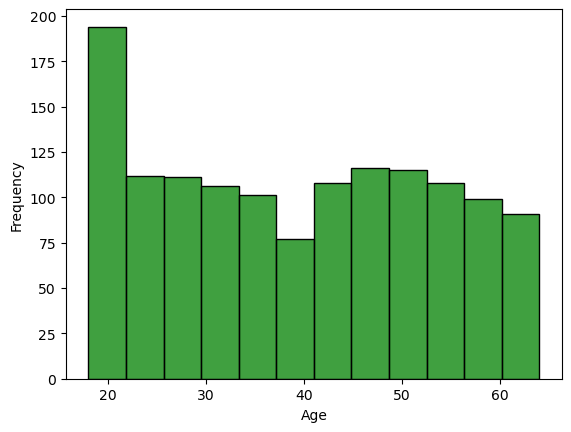

In [10]:
sns.histplot(x=df['age'],edgecolor="black",color="green")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

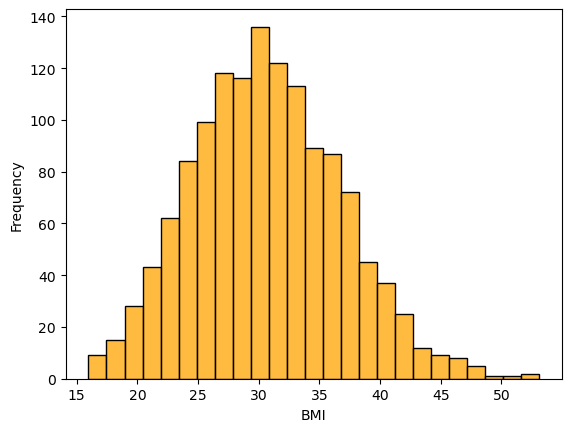

In [11]:
sns.histplot(x=df['bmi'],edgecolor="black",color="orange")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

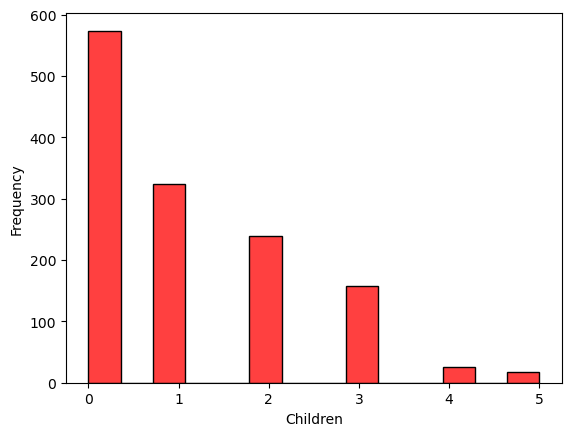

In [12]:
sns.histplot(x=df['children'],edgecolor="black",color="red")
plt.xlabel("Children")
plt.ylabel("Frequency")
plt.show()

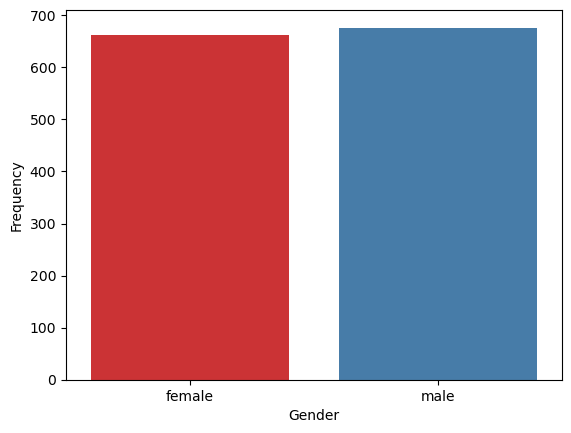

In [13]:
sns.countplot(x=df['sex'],palette="Set1")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

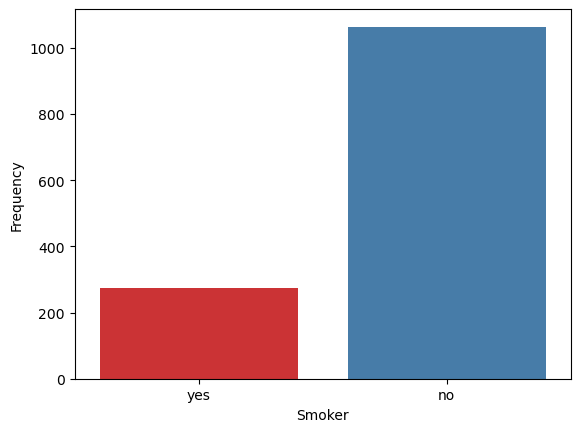

In [14]:
sns.countplot(x=df['smoker'],palette="Set1")
plt.xlabel("Smoker")
plt.ylabel("Frequency")
plt.show()

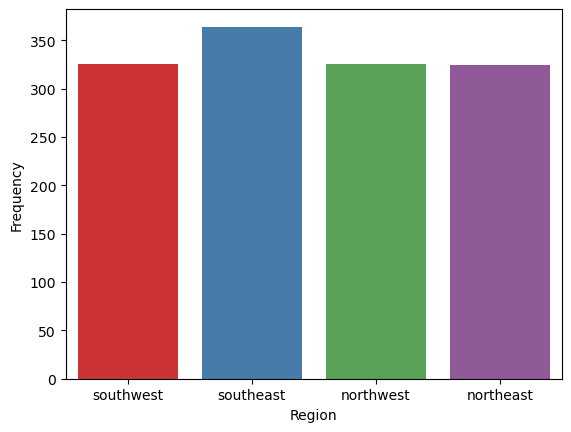

In [15]:
sns.countplot(x=df['region'],palette="Set1")
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.show()

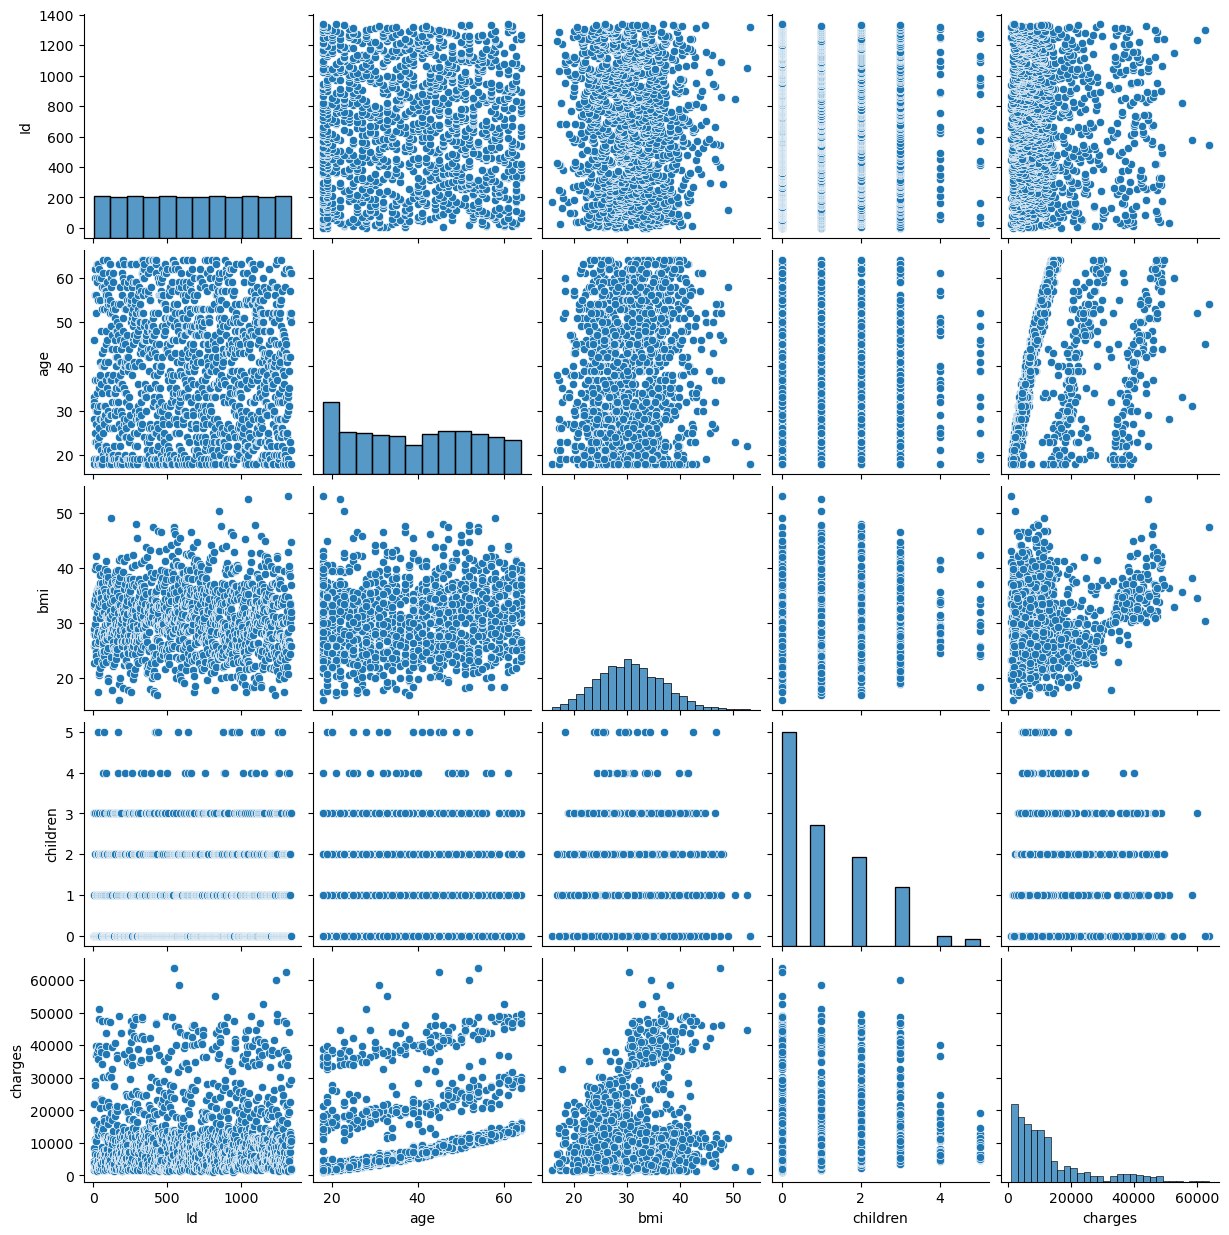

In [16]:
sns.pairplot(df)

In [17]:
df.corr()

,Id,age,bmi,children,charges
Id,1.000000,-0.031467,-0.036169,0.025221,-0.003373
age,-0.031467,1.000000,0.109272,0.042469,0.299008
bmi,-0.036169,0.109272,1.000000,0.012759,0.198341
children,0.025221,0.042469,0.012759,1.000000,0.067998
charges,-0.003373,0.299008,0.198341,0.067998,1.000000


<Axes: >

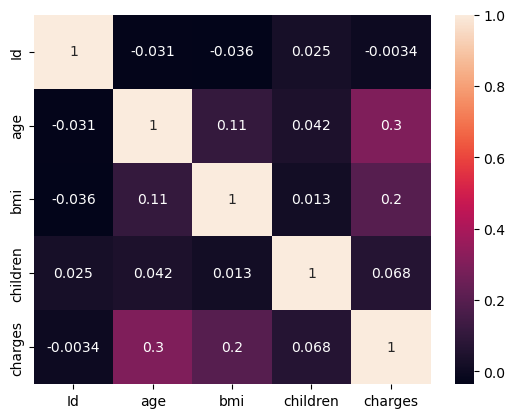

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder=LabelEncoder()
for col in cat_col:
    df[col]=encoder.fit_transform(df[col])

In [22]:
df.region.unique()

array([3, 2, 1, 0])

In [23]:
df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,0,27.900,0,1,3,16884.92400
1,2,18,1,33.770,1,0,2,1725.55230
2,3,28,1,33.000,3,0,2,4449.46200
3,4,33,1,22.705,0,0,1,21984.47061
4,5,32,1,28.880,0,0,1,3866.85520


In [24]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(df[['age','bmi']])
df[['age','bmi']]=sc.transform(df[['age','bmi']])
# df[['age','bmi']]=sc.fit_transform(df[['age','bmi']])

In [25]:
df.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,0.021739,0,0.321227,0,1,3,16884.92400
1,2,0.000000,1,0.479150,1,0,2,1725.55230
2,3,0.217391,1,0.458434,3,0,2,4449.46200
3,4,0.326087,1,0.181464,0,0,1,21984.47061
4,5,0.304348,1,0.347592,0,0,1,3866.85520


In [26]:
X=df.iloc[:,1:7]

In [27]:
y=df.iloc[:,-1]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


In [31]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def modelEvaluation(model,name):
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    print(f"======================{name}==========================\n")
    print("The R2 score of the model for training data is {}".format(round(r2_score(y_train_pred,y_train),2)))
    print("The mean squared error of the model for training data is {}".format(
        round(mean_squared_error(y_train_pred,y_train),2)))
    print("The mean absolute error of the model for training data is {}".format(
        round(mean_absolute_error(y_train_pred,y_train),2)))
    y_test_pred=model.predict(X_test)
    print("================================================\n")
    print("The R2 score of the model for testing data is {}".format(round(r2_score(y_test_pred,y_test),2)))
    print("The mean squared error of the model for testing data is {}".format(
        round(mean_squared_error(y_test_pred,y_test),2)))
    print("The mean absolute error of the model for testing data is {}".format(
        round(mean_absolute_error(y_test_pred,y_test),2)))

# Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model1=LinearRegression()

In [34]:
modelEvaluation(model1,"Linear Regression")

======================Linear Regression==========================

The R2 score of the model for training data is 0.65
The mean squared error of the model for training data is 37280663.22
The mean absolute error of the model for training data is 4208.76

The R2 score of the model for testing data is 0.71
The mean squared error of the model for testing data is 33635210.43
The mean absolute error of the model for testing data is 4186.51


# Support vector Regression Model

In [35]:
from sklearn.svm import SVR

In [36]:
model2=SVR()

In [37]:
modelEvaluation(model2,"SVR")

======================SVR==========================

The R2 score of the model for training data is -393377.09
The mean squared error of the model for training data is 158153940.44
The mean absolute error of the model for training data is 8268.36

The R2 score of the model for testing data is -385859.74
The mean squared error of the model for testing data is 166321139.32
The mean absolute error of the model for testing data is 8628.41


# K-Nearest Neighbour(KNN) Regression Model

In [38]:
from sklearn.neighbors import KNeighborsRegressor

In [39]:
model3=KNeighborsRegressor()

In [40]:
modelEvaluation(model3,"KNN")

======================KNN==========================

The R2 score of the model for training data is 0.75
The mean squared error of the model for training data is 28378638.6
The mean absolute error of the model for training data is 3201.8

The R2 score of the model for testing data is 0.63
The mean squared error of the model for testing data is 41096692.11
The mean absolute error of the model for testing data is 4006.35


# Decision Tree Regression Model

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
model4=DecisionTreeRegressor()

In [43]:
modelEvaluation(model4,"Decision Tree")

======================Decision Tree==========================

The R2 score of the model for training data is 1.0
The mean squared error of the model for training data is 244239.55
The mean absolute error of the model for training data is 29.57

The R2 score of the model for testing data is 0.75
The mean squared error of the model for testing data is 43546122.61
The mean absolute error of the model for testing data is 3087.58


# Random Forest Regression Model

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
model5=RandomForestRegressor()

In [46]:
modelEvaluation(model5,"Random Forest")

======================Random Forest==========================

The R2 score of the model for training data is 0.97
The mean squared error of the model for training data is 3623293.51
The mean absolute error of the model for training data is 1037.42

The R2 score of the model for testing data is 0.85
The mean squared error of the model for testing data is 21255553.25
The mean absolute error of the model for testing data is 2516.63


# Gradient Boost Regression Model

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
model6=GradientBoostingRegressor()

In [49]:
modelEvaluation(model6,"Gradient Boost")

======================Gradient Boost==========================

The R2 score of the model for training data is 0.88
The mean squared error of the model for training data is 14715394.94
The mean absolute error of the model for training data is 2101.36

The R2 score of the model for testing data is 0.86
The mean squared error of the model for testing data is 18941336.01
The mean absolute error of the model for testing data is 2447.17


# Neural Network (Multi-Layer perceptron) Regression Model

In [50]:
from sklearn.neural_network import MLPRegressor

In [51]:
model7=MLPRegressor()

In [52]:
modelEvaluation(model7,"Neural Network")

======================Neural Network==========================

The R2 score of the model for training data is -1757.56
The mean squared error of the model for training data is 290362913.97
The mean absolute error of the model for training data is 12196.57

The R2 score of the model for testing data is -1682.55
The mean squared error of the model for testing data is 292573217.36
The mean absolute error of the model for testing data is 11833.72


Out of all models,Gradient boost and Random Forest perfom well as their r2 score is higher compare to other r2 scores.

# Hyperparameter tuning

In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [54]:
lr_params={}
svr_params={"C":[0.1,1,10],
           "kernel":['linear','rbf'],
           "epsilon":[0.1,0.2,0.3]}
knn_params={"n_neighbors":[3,5,7,9],
           "weights" : ['uniform', 'distance']}
dt_params={
    "max_depth":[50,100,150,200],
    "min_samples_split":[1,2,3,4,5,6],
    "min_samples_leaf":[1,2,3,4,5,6],
    "max_leaf_nodes":[1,5,10,15]
}
rf_params={
    "n_estimators":[50,100,150,200],
    "max_depth":[5,10,20,50,100],
    "min_samples_leaf":[1,2,3,4,5,6],
    'ccp_alpha':[0.01,0.03,0.05,]
}
gb_params={
    "learning_rate":[0.01,0.05,0.5],
    "n_estimators":[100,150,200],
    "max_depth":[5,10,20,50],
    'ccp_alpha':[0.01,0.03,0.05,]
}

In [55]:
lr_gridSearchCV=GridSearchCV(model1,lr_params,cv=5)
svr_gridSearchCV=GridSearchCV(model2,svr_params,cv=5)
knn_gridSearchCV=GridSearchCV(model3,knn_params,cv=5)
dt_gridSearchCV=GridSearchCV(model4,dt_params,cv=5)
rf_gridSearchCV=GridSearchCV(model5,rf_params,cv=5)
gb_gridSearchCV=GridSearchCV(model6,gb_params,cv=5)

In [56]:
lr_gridSearchCV.fit(X_train,y_train)
svr_gridSearchCV.fit(X_train,y_train)
knn_gridSearchCV.fit(X_train,y_train)
dt_gridSearchCV.fit(X_train,y_train)
rf_gridSearchCV.fit(X_train,y_train)
gb_gridSearchCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'ccp_alpha': [0.01, 0.03, 0.05],
                         'learning_rate': [0.01, 0.05, 0.5],
                         'max_depth': [5, 10, 20, 50],
                         'n_estimators': [100, 150, 200]})

In [57]:
print("Linear Regression Best Hyperparameters:", lr_gridSearchCV.best_params_)
print("Support Vector Regression Best Hyperparameters:", svr_gridSearchCV.best_params_)
print("KNN Regression Best Hyperparameters:", knn_gridSearchCV.best_params_)
print("Decision Tree Regression Best Hyperparameters:", dt_gridSearchCV.best_params_)
print("Random Forest Regression Best Hyperparameters:", rf_gridSearchCV.best_params_)
print("Gradient Boosting Regression Best Hyperparameters:", gb_gridSearchCV.best_params_)

Linear Regression Best Hyperparameters: {}
Support Vector Regression Best Hyperparameters: {'C': 10, 'epsilon': 0.3, 'kernel': 'linear'}
KNN Regression Best Hyperparameters: {'n_neighbors': 9, 'weights': 'distance'}
Decision Tree Regression Best Hyperparameters: {'max_depth': 50, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Random Forest Regression Best Hyperparameters: {'ccp_alpha': 0.05, 'max_depth': 5, 'min_samples_leaf': 6, 'n_estimators': 100}
Gradient Boosting Regression Best Hyperparameters: {'ccp_alpha': 0.01, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


In [58]:
print("Linear Regression Best Score:", lr_gridSearchCV.best_score_*100)
print("Support Vector Regression Best Score:", svr_gridSearchCV.best_score_*100)
print("KNN Regression Best Score:", knn_gridSearchCV.best_score_*100)
print("Decision Tree Regression Best Score:", dt_gridSearchCV.best_score_*100)
print("Random Forest Regression Best Score:", rf_gridSearchCV.best_score_*100)
print("Gradient Boosting Regression Best Score:", gb_gridSearchCV.best_score_*100)

Linear Regression Best Score: 73.394292442297
Support Vector Regression Best Score: 0.6713922685221307
KNN Regression Best Score: 69.66774856554032
Decision Tree Regression Best Score: 83.40834002884527
Random Forest Regression Best Score: 84.81284527169063
Gradient Boosting Regression Best Score: 82.87938590489894


In [62]:
svr_model=SVR(C= 10, epsilon= 0.3, kernel= 'linear')
knn_model=KNeighborsRegressor(n_neighbors= 9, weights= 'distance')
dt_model=DecisionTreeRegressor(max_depth=50, max_leaf_nodes= 10, min_samples_leaf= 1, min_samples_split= 2)
rf_model=RandomForestRegressor(ccp_alpha=0.05,max_depth= 5, min_samples_leaf= 6, n_estimators= 100)
gb_model=GradientBoostingRegressor(ccp_alpha=0.01,learning_rate= 0.05, max_depth= 5, n_estimators= 100)

In [63]:
d={"SVM":svr_model,
  "KNN":knn_model,
  "Descision Tree":dt_model,
  "Random Forest":rf_model,
  "Gradient Boost":gb_model}

In [64]:
for k,v in d.items():
    modelEvaluation(v,k)

======================SVM==========================

The R2 score of the model for training data is -127.36
The mean squared error of the model for training data is 138455803.33
The mean absolute error of the model for training data is 7583.56

The R2 score of the model for testing data is -125.71
The mean squared error of the model for testing data is 144656879.83
The mean absolute error of the model for testing data is 7880.76
======================KNN==========================

The R2 score of the model for training data is 1.0
The mean squared error of the model for training data is 244239.55
The mean absolute error of the model for training data is 29.57

The R2 score of the model for testing data is 0.63
The mean squared error of the model for testing data is 39562872.02
The mean absolute error of the model for testing data is 3879.03
======================Descision Tree==========================

The R2 score of the model for training data is 0.84
The mean squared error of the m

In [65]:
import pickle

In [66]:
with open('gb_model','wb') as f:
    pickle.dump(gb_model,f)

In [67]:
with open('gb_model','rb') as f:
    model=pickle.load(f)

In [68]:
da={"age":19,
    "sex":0,
   "bmi":26.900,
   "children":0,
   "smoker":1,
   "region":3}

In [69]:
df_temp=pd.DataFrame(da,index=[0])
df_temp[['age','bmi']]=sc.transform(df_temp[['age','bmi']])

In [70]:
df_temp.head()

,age,sex,bmi,children,smoker,region
0,0.021739,0,0.294323,0,1,3


In [71]:
y_value=model.predict(np.array(df_temp.iloc[0].values).reshape(1,6))

In [72]:
y_value

array([17160.28842639])